## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [2]:
## import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv("./titanic/train.csv")

#### 1. 본문에서 언급된 Feature을 제외하고 유의미한 Feature을 1개 이상 찾아보자!

In [4]:
titanic_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

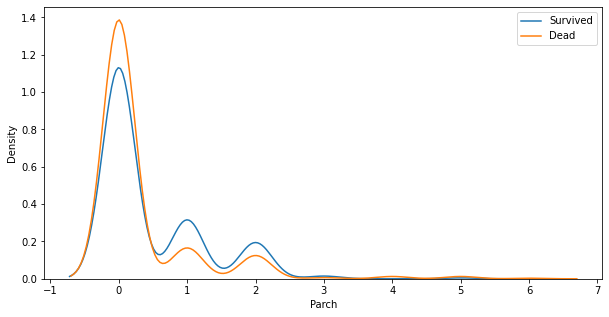

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Parch'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Parch'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

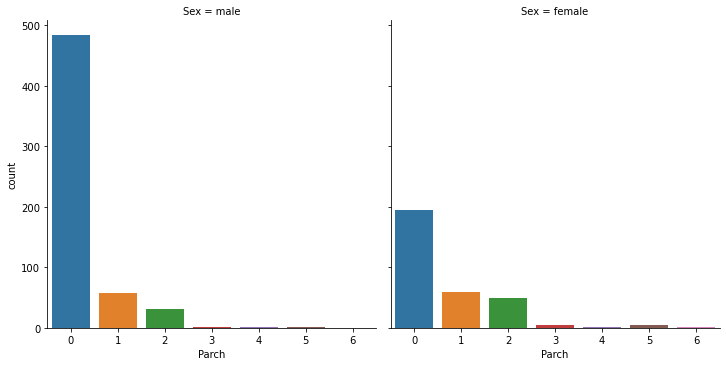

In [6]:
sns.catplot(x='Parch', col='Sex', kind='count', data=titanic_df)
plt.show()

In [7]:
titanic_df[['Parch', 'Sex']].groupby('Sex').mean()
# 평균 Parch가 높은 것을 봐서 female 보다 male이 혼자 많이 온다는 것을 알 수 있음.

,Parch
Sex,
female,0.649682
male,0.235702


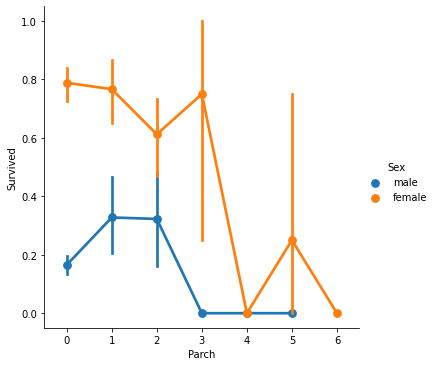

In [8]:
#근데 female이 살아남을 확률이 높았으니까, Parch가 0에 가까울 수록
#survive 할 확률이 낮은건가?
sns.catplot(x='Parch', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()
#그건 아닌 것 같다. 왜냐하면 3,4,5,6 의 표본이 너무 적음

In [9]:
titanic_df[['Sex', 'Survived', 'Parch']].groupby(['Sex', 'Parch']).mean()

Survived
Sex    Parch          
female 0      0.788660
       1      0.766667
       2      0.612245
       3      0.750000
       4      0.000000
       5      0.250000
       6      0.000000
male   0      0.165289
       1      0.327586
       2      0.322581
       3      0.000000
       4      0.000000
       5      0.000000

In [10]:
# 3,4,5,6 은 표본이 너무 작아서 거의 데이터가 무의미 또한 3,4,5,6의 경우 대부분 사망
titanic_df[['Sex', 'Survived', 'Parch']].groupby(['Sex', 'Parch']).count()

Survived
Sex    Parch          
female 0           194
       1            60
       2            49
       3             4
       4             2
       5             4
       6             1
male   0           484
       1            58
       2            31
       3             1
       4             2
       5             1

In [11]:
# female의 경우 0,1,2만 보았을 때 여성은 오히려 혼자 왔을 경우 
# survive 확률이 높은 반면
# 남자는 혼자온 경우 survive 확률이 낮음.

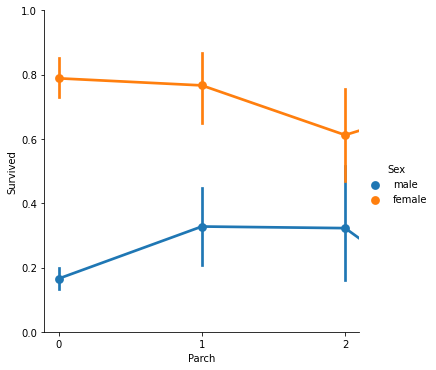

In [12]:
# 따라서 axis를 제한함.
sns.catplot(x='Parch', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.axis([-0.1,2.1,0,1])
plt.show()

**Parch가 0,1,2일 경우 (여기에만 표본이 몰려있음)  
결론 : Parch가 0에 가까우면 여성의 경우 survive 확률이 높아지고, 남성은 그 반대이다.**

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

In [13]:
terror_df = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding="latin1", low_memory=False)

In [14]:
terror_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
terror_df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [16]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
terror_df.isnull().count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate    181691
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related       181691
Length: 135, dtype: int64

In [18]:
terror_df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


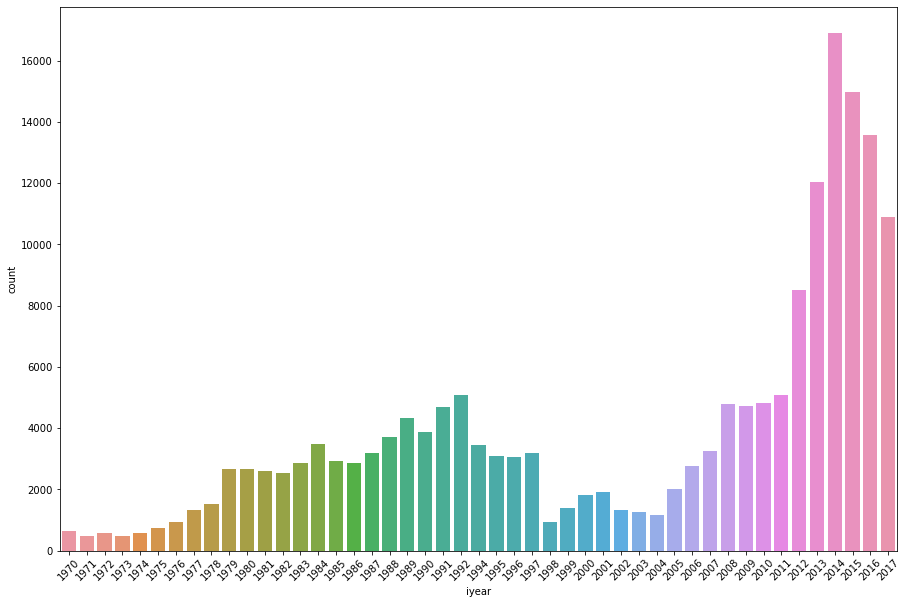

In [19]:
# iyear과 imonth에 따른 terror 조사 그리고 country를 feature로 생각
plt.figure(figsize=(15,10))
sns.countplot(x='iyear', data=terror_df)
plt.xticks(rotation=45)
plt.show()

**위와 같은 정보에서 terror가 시간이 지날수록 점점 많이 일어난다는 것을 알 수 있다.**

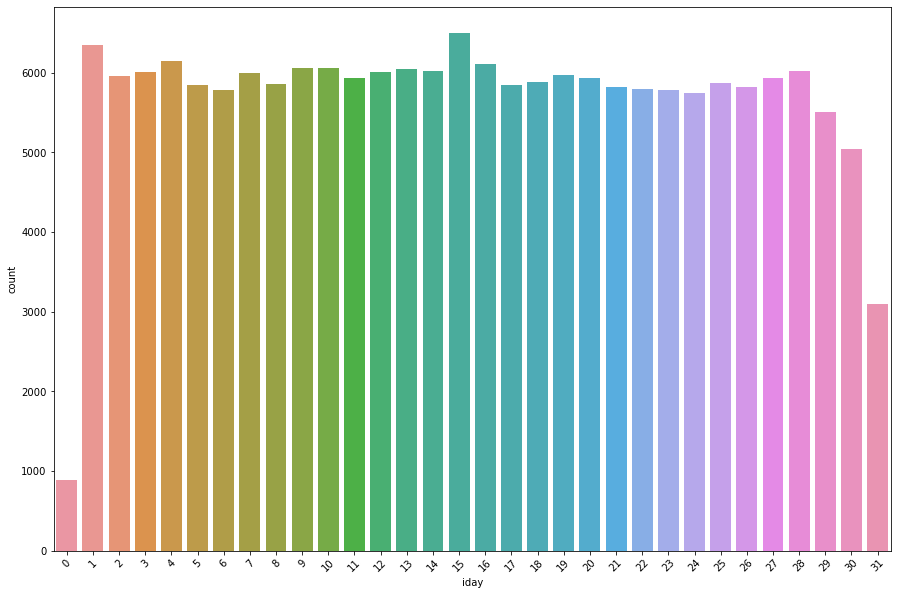

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='iday', data=terror_df)
plt.xticks(rotation=45)
plt.show()

**iday와 imonth에서 terror와의 연관관계를 찾기 힘들었다**

In [21]:
terror_df[['iyear', 'country']].groupby('iyear').mean()

,country
iyear,
1970,214.846390
1971,272.804671
1972,387.619718
1973,322.634249
1974,300.022375
1975,281.051351
1976,234.079090
1977,195.071266
1978,156.110747


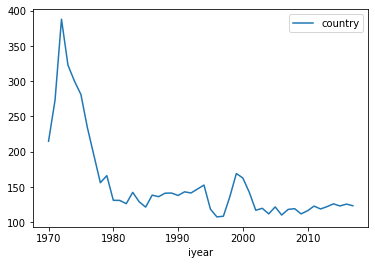

In [22]:
terror_df[['iyear', 'country']].groupby('iyear').mean().plot()
plt.show()

**year이 적을 수록 country code가 높은 쪽에서 테러가 많이 일어났다**

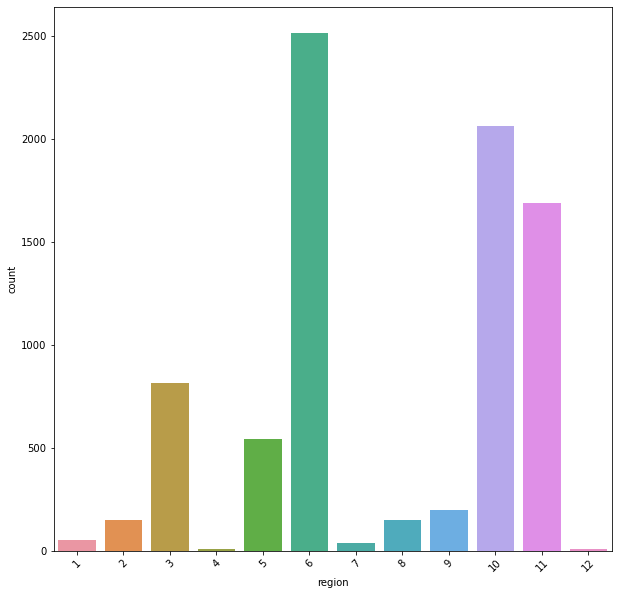

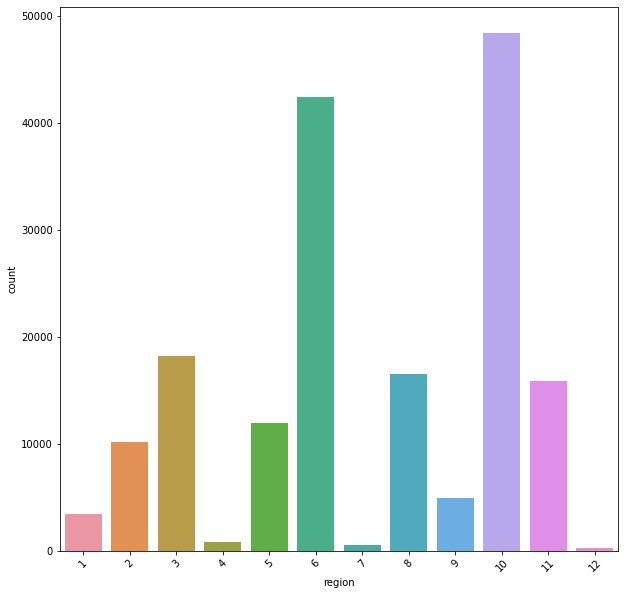

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x=terror_df['region'][terror_df['extended']==1])
plt.xticks(rotation=45)
#sns.catplot(x='iyear', col='extended', kind='count', data=terror_df)
plt.figure(figsize=(10,10))
sns.countplot(x=terror_df['region'][terror_df['extended']==0])
plt.xticks(rotation=45)
plt.show()

In [24]:
terror_df['region'][terror_df['extended']==1].mean()

7.6776307804345185

In [25]:
terror_df['region'][terror_df['extended']==0].mean()

7.136395083366003

In [26]:
terror_df[['iyear', 'iday']].groupby('iyear').mean()

,iday
iyear,
1970,14.877112
1971,15.152866
1972,16.955986
1973,15.097252
1974,15.266781
1975,14.975676
1976,14.696641
1977,15.317665
1978,15.124509


In [27]:
terror_df[['targtype1_txt', 'extended']].groupby('targtype1_txt').mean()

,extended
targtype1_txt,
Abortion Related,0.003802
Airports & Aircraft,0.052122
Business,0.047511
Educational Institution,0.054373
Food or Water Supply,0.025237
Government (Diplomatic),0.062692
Government (General),0.051309
Journalists & Media,0.124491
Maritime,0.176638


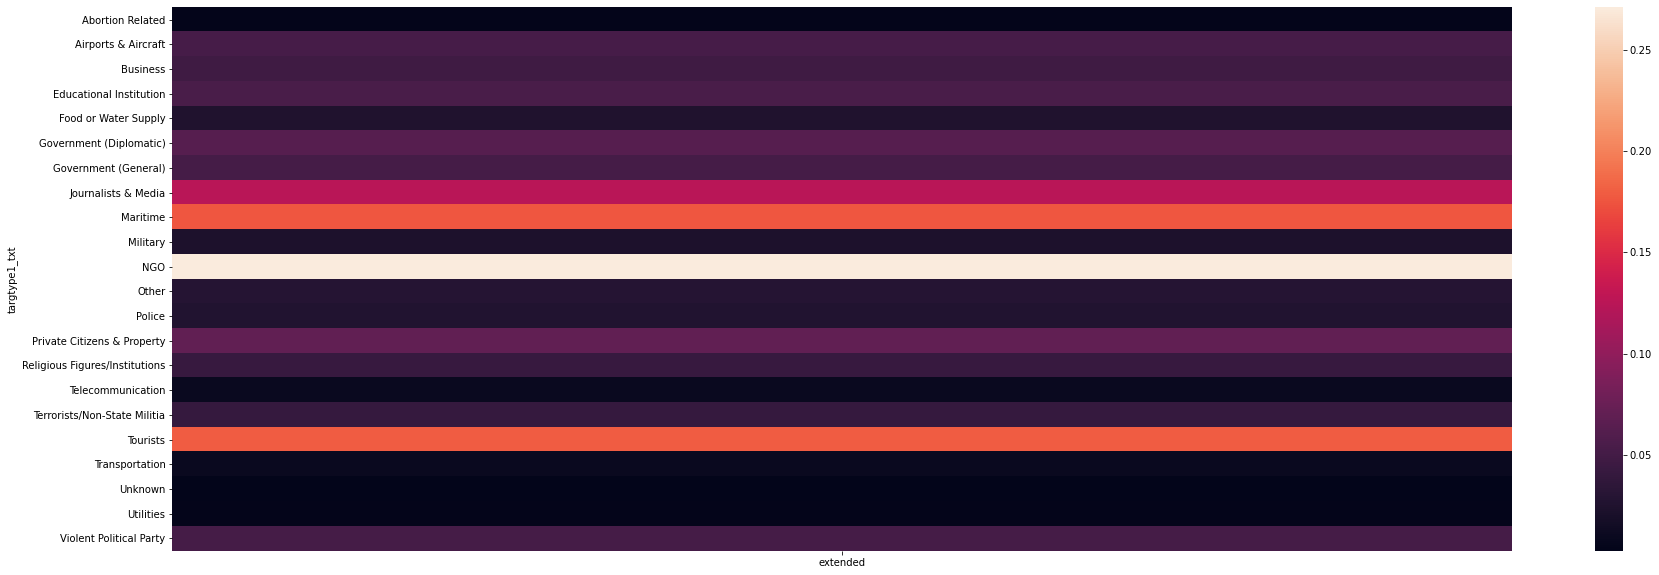

In [28]:
plt.figure(figsize=(30, 10))
sns.heatmap(terror_df[['targtype1_txt', 'extended']].groupby('targtype1_txt').mean())
plt.show()

**Target Type 중 Tourists와 NGO, Maritime, Journalists & Media인 Target이 24시간 이상 장시간 Terror를 다른 Target보다 더 많이 받았다.**